# ADV ML HW1

# Estelle Chan

In [1]:
#install aimodelshare library
! pip install aimodelshare --upgrade

In [2]:
#Get competition data from course folder and unzip
# importing the zipfile module
from zipfile import ZipFile
  
# loading the temp.zip and creating a zip object
with ZipFile("world_happiness_competition_data.zip", 'r') as zObject:
  
    # Extracting all the members of the zip 
    # into a specific location.
    zObject.extractall()

In [3]:
# Load data
import pandas as pd
X_train = pd.read_csv('world_happiness_competition_data/X_train.csv')
X_test = pd.read_csv('world_happiness_competition_data/X_test.csv')
y_train = pd.read_csv('world_happiness_competition_data/y_train.csv')
y_train_labels = y_train.idxmax(axis=1)

X_train.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks
0,Peru,0.960,1.274,0.854,0.455,0.083,0.027,Peru,Americas,Latin America and the Caribbean,18.000000
1,Nicaragua,0.694,1.325,0.835,0.435,0.200,0.127,Nicaragua,Americas,Latin America and the Caribbean,125.611111
2,Greece,1.181,1.156,0.999,0.067,0.000,0.034,Greece,Europe,Southern Europe,112.000000
3,Qatar,1.684,1.313,0.871,0.555,0.220,0.167,Qatar,Asia,Western Asia,57.333333
4,Uzbekistan,0.745,1.529,0.756,0.631,0.322,0.240,Uzbekistan,Asia,Central Asia,125.611111


In [4]:
y_train.head()

,Average,High,Low,Very High,Very Low
0,1,0,0,0,0
1,0,1,0,0,0
2,1,0,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0


In [5]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# We create the preprocessing pipelines for both numeric and categorical data.

numeric_features = X_train.drop(['Country or region', 'name', 'region', 'sub-region'], axis=1)
numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['region', 'sub-region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train) 

In [6]:
# Write function to transform data with preprocessor

def preprocessor(data):
    data.drop(['Country or region', 'name'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

In [7]:
# check shape of X data after preprocessing it using our new function
preprocessor(X_train).shape

(88, 26)

## Q1.Explore bivariate results (Use visualizations)

In [8]:
df = pd.concat([X_train, y_train])

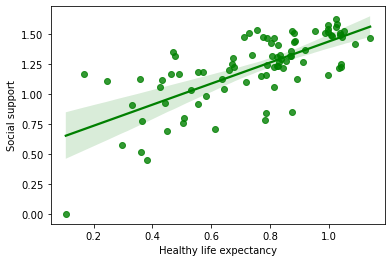

In [9]:
import seaborn as sns
plot1 = sns.regplot(x="Healthy life expectancy", y= "Social support", data=X_train, color='g')

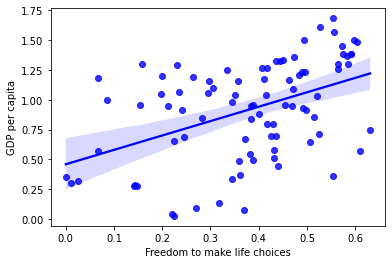

In [10]:
plot2= sns.regplot(x="Freedom to make life choices", y="GDP per capita", data=X_train, color='b')

## Q2. Examine features that predict happiness categories using one or more models that allow for automatic feature selection

In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [12]:
x = X_train.iloc[:,1:7]
y = y_train.iloc[:,0]

In [13]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(x, y)

SelectFromModel(estimator=RandomForestClassifier())

In [14]:
selected_feat= x.columns[(sel.get_support())]
len(selected_feat)

3

In [15]:
print(selected_feat)

Index(['Social support', 'Generosity', 'Perceptions of corruption'], dtype='object')


## Q3.Experiment with different prediction models to try to predict World Happiness well (Fit and compare, at minimum, three models)

In [16]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=300, max_depth=3)
model.fit(preprocessor(X_train), y_train_labels) # Fitting to the training set.
model.score(preprocessor(X_train), y_train_labels) # Fit score, 0-1 scale.

0.8522727272727273